In [4]:
import pandas as pd
import numpy as np
from DCSegUtils import *
import seaborn as sb

In [21]:
data = pd.read_csv('results/run_2019-09-10 13:41:52.234698.csv', index_col=0)
data['consensus_progress'] = data['consensus_current']/data['consensus_start']
data['AGR_vs_MV DSC'] = data['d_agr_gt_DSC']/data['d_mv_gt_DSC']

In [6]:
plot = sb.relplot(data=data, x='step', y='mae', kind='line', hue='method', style='method', row='label', col='model', facet_kws={'sharey':'row'})

NameError: name 'm' is not defined

In [7]:
data.columns

Index(['sample', 'method', 'step', 'agent', 'status', 'consensus_start',
       'consensus_current', 'd_prop_agr_MAE', 'd_prop_agr_DSC',
       'd_prop_gt_MAE', 'd_prop_gt_DSC', 'd_agr_gt_MAE', 'd_agr_gt_DSC',
       'd_mv_gt_MAE', 'd_mv_gt_DSC', 'd_mv_agr_MAE', 'd_mv_agr_DSC',
       'fp_agr_gt', 'fp_mv_gt', 'fp_prop_gt', 'fn_agr_gt', 'fn_mv_gt',
       'fn_prop_gt', 'tp_agr_gt', 'tp_mv_gt', 'tp_prop_gt', 'tn_agr_gt',
       'tn_mv_gt', 'tn_prop_gt'],
      dtype='object')

In [24]:
sb.set(rc={'figure.figsize':(11.7,8.27)})

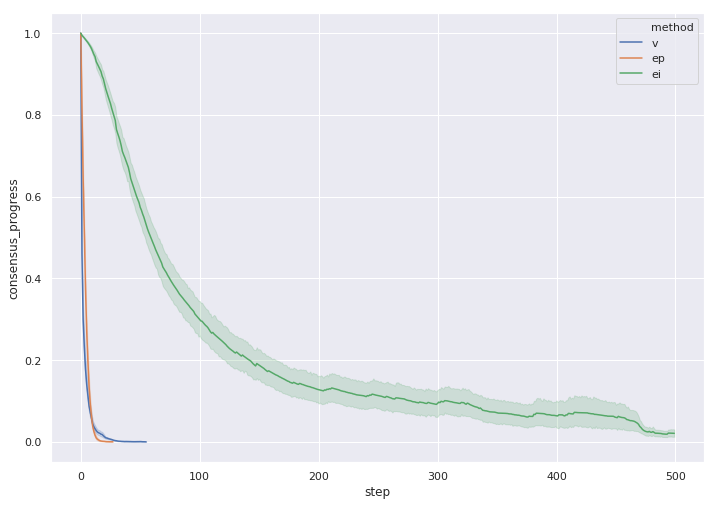

In [25]:
# Convergence speed
sb.lineplot(data=data, x='step', y='consensus_progress', hue='method')

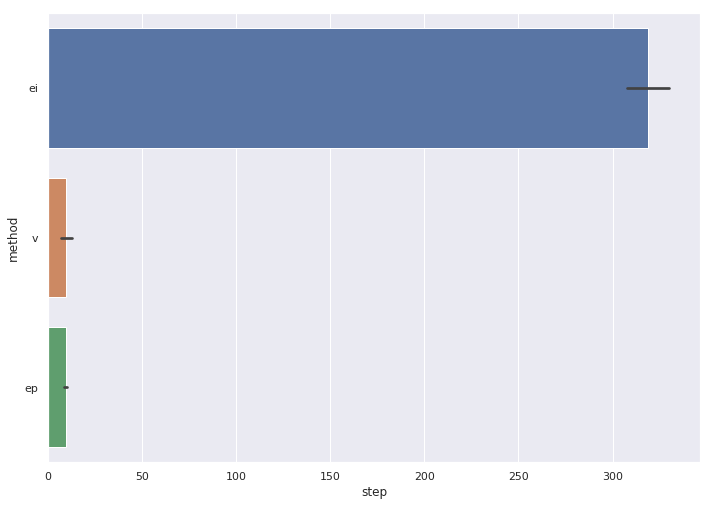

In [55]:
# Termination speed (at 98%)
almost_done = data[data['consensus_progress']<0.02]
idx = almost_done.groupby(['sample'])['consensus_progress'].transform(max) == almost_done['consensus_progress']
last_steps = almost_done[idx]
sb.barplot(data=last_steps, x='step', y='method')

In [56]:
data[data['AGR_vs_MV DSC']>1]

,sample,method,step,agent,status,consensus_start,consensus_current,d_prop_agr_MAE,d_prop_agr_DSC,d_prop_gt_MAE,...,fn_mv_gt,fn_prop_gt,tp_agr_gt,tp_mv_gt,tp_prop_gt,tn_agr_gt,tn_mv_gt,tn_prop_gt,consensus_progress,AGR_vs_MV DSC
4,0,v,1,ag_bird,negotiation,3729,884,0.002423,0.991889,0.010985,...,725,1016,49465,49451,49160,199993,199979,199688,0.237061,1.000283
5,0,v,1,ag_cat,negotiation,3729,884,0.003042,0.993403,0.009513,...,725,676,49465,49451,49500,199993,199979,200028,0.237061,1.000283
6,0,v,1,ag_dog,negotiation,3729,884,0.002213,0.991410,0.011093,...,725,924,49465,49451,49252,199993,199979,199780,0.237061,1.000283
7,0,v,1,ag_horse,negotiation,3729,884,0.003364,0.996712,0.013602,...,725,758,49465,49451,49418,199993,199979,199946,0.237061,1.000283
8,0,v,2,ag_bird,negotiation,3729,478,0.001239,0.995914,0.010663,...,725,800,49497,49451,49376,200025,199979,199904,0.128184,1.000930
9,0,v,2,ag_cat,negotiation,3729,478,0.001651,0.995257,0.010041,...,725,665,49497,49451,49511,200025,199979,200039,0.128184,1.000930
10,0,v,2,ag_dog,negotiation,3729,478,0.000744,0.998107,0.011081,...,725,700,49497,49451,49476,200025,199979,200004,0.128184,1.000930
11,0,v,2,ag_horse,negotiation,3729,478,0.001261,0.998406,0.011776,...,725,707,49497,49451,49469,200025,199979,199997,0.128184,1.000930
12,0,v,3,ag_bird,negotiation,3729,264,0.000834,0.998585,0.010486,...,725,703,49506,49451,49473,200034,199979,200001,0.070796,1.001112
13,0,v,3,ag_cat,negotiation,3729,264,0.001144,0.996472,0.010187,...,725,667,49506,49451,49509,200034,199979,200037,0.070796,1.001112


In [48]:
data[data['step']==499]['consensus_progress']

,sample,method,step,agent,status,consensus_start,consensus_current,d_prop_agr_MAE,d_prop_agr_DSC,d_prop_gt_MAE,...,fn_mv_gt,fn_prop_gt,tp_agr_gt,tp_mv_gt,tp_prop_gt,tn_agr_gt,tn_mv_gt,tn_prop_gt,consensus_progress,AGR_vs_MV DSC
3640,1,ei,499,ag_bird,negotiation,1546,1,4.722372e-07,1.000000,0.013782,...,1428,1342,48834,48748,48834,199362,199276,199362,0.000647,1.001764
3641,1,ei,499,ag_cat,negotiation,1546,1,3.730955e-07,0.999980,0.013783,...,1428,1342,48834,48748,48834,199362,199276,199362,0.000647,1.001764
3642,1,ei,499,ag_dog,negotiation,1546,1,2.807194e-07,0.999980,0.013783,...,1428,1342,48834,48748,48834,199362,199276,199362,0.000647,1.001764
3643,1,ei,499,ag_horse,negotiation,1546,1,3.961713e-07,1.000000,0.013783,...,1428,1342,48834,48748,48834,199362,199276,199362,0.000647,1.001764
19876,12,ei,499,ag_bird,negotiation,187,8,1.752636e-04,0.999841,0.000306,...,8,16,50168,50168,50160,200696,200696,200688,0.042781,1.000000
19877,12,ei,499,ag_cat,negotiation,187,8,4.103921e-04,1.000000,0.000685,...,8,8,50168,50168,50168,200696,200696,200696,0.042781,1.000000
19878,12,ei,499,ag_dog,negotiation,187,8,2.102836e-04,1.000000,0.000074,...,8,8,50168,50168,50168,200696,200696,200696,0.042781,1.000000
19879,12,ei,499,ag_horse,negotiation,187,8,2.150067e-04,1.000000,0.000069,...,8,8,50168,50168,50168,200696,200696,200696,0.042781,1.000000
22084,13,ei,499,ag_bird,negotiation,882,4,2.800293e-05,0.999980,0.020977,...,2560,2562,47615,47616,47614,198143,198144,198142,0.004535,0.999979
22085,13,ei,499,ag_cat,negotiation,882,4,3.079106e-05,0.999940,0.020996,...,2560,2562,47615,47616,47614,198143,198144,198142,0.004535,0.999979


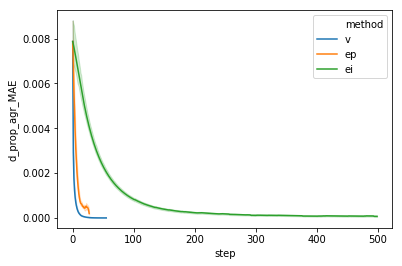

In [16]:
# Termination speed
sb.lineplot(data=data, x='step', y='d_prop_agr_MAE', hue='method')

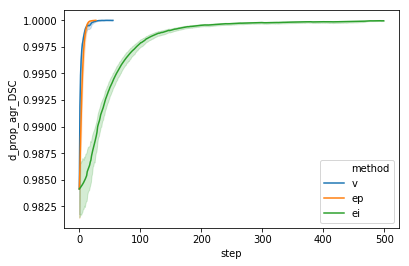

In [17]:
sb.lineplot(data=data, x='step', y='d_prop_agr_DSC', hue='method')

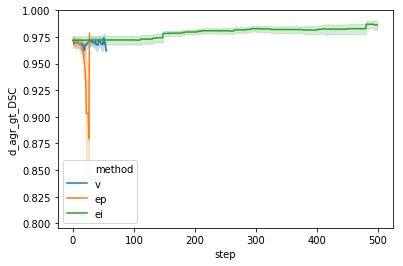

In [18]:
sb.lineplot(data=data, x='step', y='d_agr_gt_DSC', hue='method')

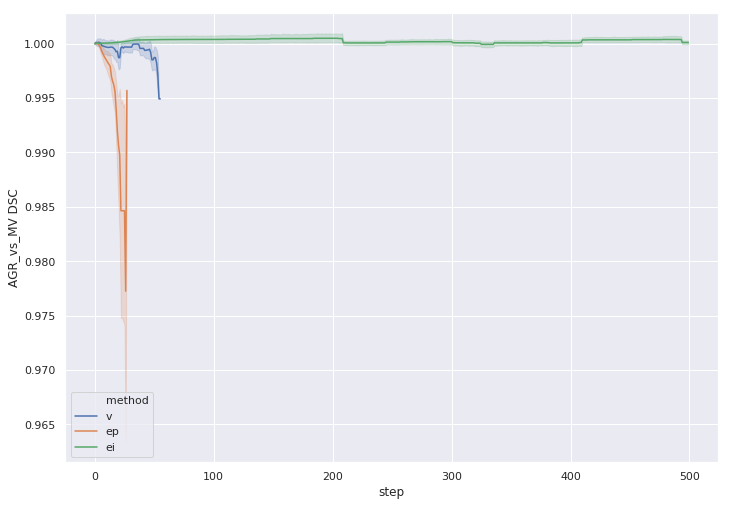

In [26]:
# Relative Performance vs Majority voting (1.0 performance)
sb.lineplot(data=data, x='step', y='AGR_vs_MV DSC', hue='method')

In [27]:
data[data['consensus_progress']==1]

,sample,method,step,agent,status,consensus_start,consensus_current,d_prop_agr_MAE,d_prop_agr_DSC,d_prop_gt_MAE,...,fn_mv_gt,fn_prop_gt,tp_agr_gt,tp_mv_gt,tp_prop_gt,tn_agr_gt,tn_mv_gt,tn_prop_gt,consensus_progress,AGR_vs_MV DSC
0,0,v,0,ag_bird,negotiation,3729,3729,0.008962,0.987125,0.010164,...,725,1232,49450,49451,48944,199978,199979,199472,1.0,0.999980
1,0,v,0,ag_cat,negotiation,3729,3729,0.008921,0.989676,0.006218,...,725,682,49450,49451,49494,199978,199979,200022,1.0,0.999980
2,0,v,0,ag_dog,negotiation,3729,3729,0.010434,0.982183,0.010043,...,725,1232,49450,49451,48944,199978,199979,199472,1.0,0.999980
3,0,v,0,ag_horse,negotiation,3729,3729,0.017230,0.950654,0.022944,...,725,2778,49450,49451,47398,199978,199979,197926,1.0,0.999980
100,0,ep,0,ag_bird,negotiation,3729,3729,0.008962,0.987125,0.010164,...,725,1232,49450,49451,48944,199978,199979,199472,1.0,0.999980
101,0,ep,0,ag_cat,negotiation,3729,3729,0.008921,0.989676,0.006218,...,725,682,49450,49451,49494,199978,199979,200022,1.0,0.999980
102,0,ep,0,ag_dog,negotiation,3729,3729,0.010434,0.982183,0.010043,...,725,1232,49450,49451,48944,199978,199979,199472,1.0,0.999980
103,0,ep,0,ag_horse,negotiation,3729,3729,0.017230,0.950654,0.022944,...,725,2778,49450,49451,47398,199978,199979,197926,1.0,0.999980
176,0,ei,0,ag_bird,negotiation,3729,3729,0.008962,0.987125,0.010164,...,725,1232,49450,49451,48944,199978,199979,199472,1.0,0.999980
177,0,ei,0,ag_cat,negotiation,3729,3729,0.008921,0.989676,0.006218,...,725,682,49450,49451,49494,199978,199979,200022,1.0,0.999980
